In [11]:
# Tratamiento de datos
# -----------------------------------------------------------------------
import pandas as pd
import numpy as np

# Visualizaciones
# -----------------------------------------------------------------------
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn import tree

# Para realizar la regresión lineal y la evaluación del modelo
# -----------------------------------------------------------------------
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split,GridSearchCV
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error
import sys
sys.path.append("../../")
from src.soporte_metricas import(
    generar_df_comparador,
    scatterplot_regresion,
    residual_plot,
    obtener_metricas
)

In [12]:
df = pd.read_csv("../../datos/06_rent_outliers_gestionados.csv")

In [30]:
df.shape

(442, 83)

# Realizamos Regresión Lineal

### Dividimos los Grupos (70% train y 30% test)

In [13]:
X = df.drop(columns="price")
y = df[["price"]]

In [14]:
X_train, X_test, y_train, y_test = train_test_split(X,y,train_size=0.7,random_state=42)

### Generamos Regresión Lineal

In [15]:
modelo_lineal = LinearRegression()
modelo_lineal.fit(X_train,y_train)

LinearRegression()

### Hacemos predicciones de Precio del 70% y el 30%
Con ello veremos que tan bien se le da a nuestro modelo predecir


In [16]:
y_train_pred = modelo_lineal.predict(X_train)
y_train_pred[:3]

array([[568.15614438],
       [685.06323851],
       [609.83943797]])

In [17]:
y_test_pred = modelo_lineal.predict(X_test)
y_test_pred[:3]

array([[705.09979869],
       [670.22886429],
       [624.83591949]])

# Veamos las métricas

In [19]:
obtener_metricas(y_train,y_train_pred,y_test,y_test_pred)

,r2_score,MAE,MSE,RMSE
train,0.580101,39.698945,2662.519113,51.599604
test,0.436209,52.506680,4812.340394,69.371034


### No son perfectas pero...
- Están bien!, el error lo podremos rebajar y el overfitting también 
- Estos datos no son lineales, algo clave en porque no se ajustan mejor los datos...
- Pero si es verdad que nos indican que este modelo está diseñado de manera correcta

# Visualizar Modelo
- Así vemos que tal se ajusta a la realidad

In [21]:
df_comparador = generar_df_comparador(X_train,X_test,y_train,y_test,y_train_pred,y_test_pred,"price_pred")

In [25]:
comparaciones = df_comparador[["price","price_pred"]]

In [27]:
comparaciones["diferencia"] = comparaciones["price_pred"] - comparaciones["price"]
comparaciones.head()

,price,price_pred,diferencia
0,550.0,719.948079,169.948079
1,750.0,731.243356,-18.756644
2,750.0,703.318127,-46.681873
3,400.0,617.828926,217.828926
4,450.0,523.394816,73.394816


# Scatter Plot 
- Con su línea de Regresión

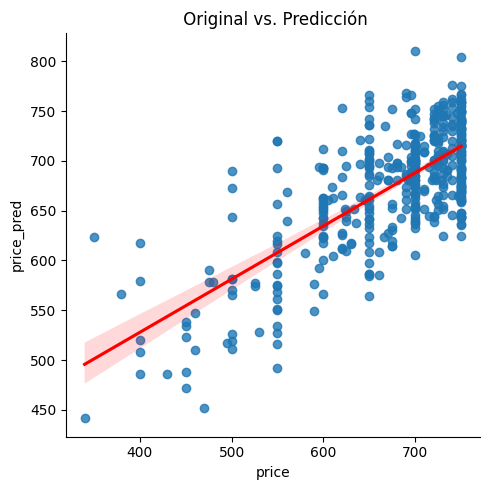

In [28]:
scatterplot_regresion(df_comparador,"price","price_pred")

# Sobre la gráfica
- Confirma que las predicciones se acercan a la realidad
- Si es verdad que como nos faltan datos de los más baratos, el modelo tiende a no acercarse tanto

# Residual Plot

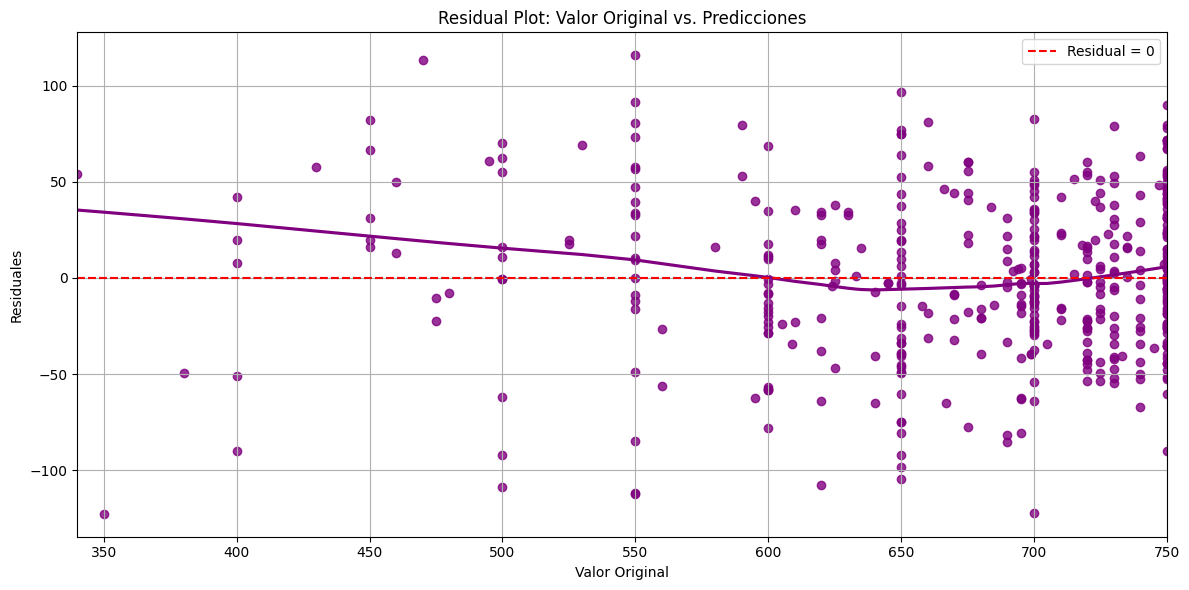

In [29]:
residual_plot(df_comparador,"price","price_pred")

# Sobre la gráfica
- Está encontrando problemas en los precios extremos
- En los precios intermedios se ajusta mejor
- En las casas más baratas tiende a sobre-estimar los precios

- Esto nos vuelve a indicar que la regresión Lineal no es el mejor modelo para nosotros, pasemos a Modelos no Lineales